# Формальный метод определения взаимной понятности славянских языков
### Клышинский Эдуард, Заболотняя Татьяна, Радойчич Мария, Логачёва Варвара
#### 06.12.2019, семинар СПбГУ

### План презентации
- [Обзор работ в области взаимной понятности языков](#review).
- [Метод определения взаимной понятности](#method).
- [Программный инструментарий](#tools).
- [Полученные результаты](#results).


<a name="review"></a>
### Обзор работ в области взаимной понятности языков

Под понятностью языка A для носителя языка B будем понимать средний процент правильных ответов, которые дали носители языка B при прохождении теста на языке A.

Понятность между двумя языками не является симметричной, то есть то, что ясно для носителей языка A в языке B, может быть не понятно для носителей языка B в языке A. 

Среди работ в данной области следует особо выделить большой проект [MICReLa](https://www.let.rug.nl/gooskens/project/?p=publications), посвященный анализу понятности основных мировых языков. Например, в статье [Mutual intelligibility between West and South Slavic languages](https://link.springer.com/article/10.1007%2Fs11185-015-9150-9) авторы показывают степень понятности западных и южных славянских языков. Полученные ими результаты при определении сходства показаны на рисунке ниже. 
![](img/review1.png)

При анализе понятности языков следует различать понятность устной речи, письменной речи и другие виды понятности, так как в них испытуемый проводит анализ разных характеристик. 

Для определения понятности языков используют различные методики:
- прослушивание и пересказ;
- перевод текста;
- перевод отдельных слов;
- выбор одного из вариантов перевода;
- тест с пропущенными словами;
- выбор иностранной фразы, наиболее полно описывающей изображение;
- опрос понятности языка по суъективным ощущениям.

<a name="method"></a>
### Метод определения взаимной понятности

В данной работе мы анализировали понятность текста на иностранном славянском языке при помощи теста с пропущенными словами.

Опрашиваемому предъявлялся параллельный текст на родном и иностранном славянском языках. Для языков, записываемых кириллицей, давалась транслитерация на латиницу. Для языков, записываемых латиницей, давалась транслитерация на кириллицу. В тексте на родном языке были пропущены некоторые слова, которые опрашиваемый должен был заполнить. Пропускались слова значимых частей речи: существительное, прилагательное и глагол. Расстояние между пропущенными словами  строго не выдерживалось. 

Для оценки корректности ответов использовались следующие градации.<br>
Ответ считается *корректным*, если указано слово из художественного текста, его синоним или другое слово, передающее смысл пропущенного.<br>
Ответ считается *частично корректным*, если указано слово с тем же смыслом, но с измененной частью речи, или указано слово той же части речи, подходящее по тексту, но изменяющее смысл.<br>
Ответ *некорректен*, если не угадана часть речи, дана калька из параллельного текста, написана глупость или слово пропущено.<br>
В дальнейшем за корректный ответ давалось одно очко, за частично корректный ответ - 0,5, и за некорректный - 0 очков.

Для контроля использовался текст только на родном языке, без параллельного иностранного текста, оцениваемый по тем же критериям. Таким образом, в нашем случае понятность иностранного текста определяется как превышение средней понятности текста (средней суммы баллов ответов пользователей) над контрольным значением.

В ходе проверки отсеивались пользователи с менее чем 6 ответами или одним-двумя отличиями от исходного текста на родном языке. Сделаны некоторые исключения для случая украинский родной и русский параллельный тексты, так как русский язык известен подавляющему большинству населения Украины.

Проверку проводил один эксперт для каждого родного языка. Эксперт являлся носителем данного языка.

<a name="tools"></a>
### Программный инструментарий

Тесты были размещены на сайте ([русская версия теста](http://cosyco.ru/under/rus.html), большая просьба не отправлять результаты, так как Вам по ходу чтения станут известны ответы). Также на сайте располагался интерейс проверяющих, который включал в себя интерфейс проверки и интерфейс контроля результатов (рисунки приведены ниже).

![Интерфейс проверки ответов](img/interface1.png)
<center>Интерфейс проверки ответов</center>

![Интерфейс контроля результатов](img/interface2.png)
<center>Интерфейс контроля результатов</center>


<a name="results"></a>
### Полученные результаты

Для просмотра результатов исследования вам необходимо выполнить код, который идет ниже.

**Имейте в виду**, для изменения выбора в элементах интерфейса нужно выполнить текущую ячейку. После выполнения другой ячейки, эта перестанет перерисовывать результаты.

In [1]:
# Загрузка библиотек.
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib as pl
import matplotlib.pyplot as plt

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

import seaborn as sns
import matplotlib.transforms as transforms
from math import sqrt
from ipywidgets import interact, interactive_output, Select, HBox, FloatSlider
from IPython.display import display
import copy

Загрузка полученных данных.
- *part_no_20191012.csv* - количество участников по каждому языку и тесту (родной язык, номер теста, язык параллельного текста, число участников);
- *all_users_20191012.csv* - данные по пользователям (родной язык, язык параллельного текста, номер теста, знание иностранных славянских языков, уровень образования, лингвистическое образование, средний балл за пройденный тест);
- *qu_data_20191012.csv* - точность ответов для пропущенных слов (родной язык, номер теста, номер пропущенного слова в тесте, параллельный язык, средний балл ответов);
- *texts_20191012.csv* - тексты, использованные в тестах (номер теста, номер предложения, язык текста, текст предложения в котором пропускаемые слова выделены подчеркиваниями).

In [2]:
user_data = pd.read_csv("data/raw_data/user_data.csv", index_col=0)
users_answers = pd.read_csv("data/raw_data/user_answers.csv", index_col=0)

In [3]:
text_frame = pd.read_csv("data/raw_data/texts.csv", index_col=0)
text_frame['id_set']=text_frame['id_set'].astype("str")

In [4]:
users_answers["marks"] = users_answers["correctness"]
users_answers["marks"] = users_answers["marks"].replace({"corr":1, "pcorr":0.5, "incorr":0})

In [5]:
mean_marks = users_answers.groupby("id_user").mean()["marks"]
mean_marks.name = "mean_mark"
user_data = user_data.join(mean_marks, on="id_user")

In [6]:
part_no = pd.DataFrame(columns=["test_id","parallel_lang", "count"])
req = user_data.groupby(["test_id", "parallel_lang"]).count()
part_no["count"] = req["id_user"]
part_no["test_id"] = req.index.get_level_values("test_id")
part_no["parallel_lang"] = req.index.get_level_values("parallel_lang")
part_no.index = range(part_no.shape[0])

In [7]:
qu_data = pd.DataFrame()
req = users_answers[["test_id", "parallel_lang", "answer_no", "marks"]].groupby(["test_id", "parallel_lang", "answer_no"]).mean()
qu_data["mean_mark"] = req["marks"]
qu_data["test_id"] = req.index.get_level_values("test_id")
qu_data["parallel_lang"] = req.index.get_level_values("parallel_lang")
qu_data["answer_no"] = req.index.get_level_values("answer_no")
qu_data.index = range(qu_data.shape[0])

In [34]:
def drawCompleteness(test_id):
    dat = users_answers[(~users_answers["answer"].isna())&(users_answers["test_id"]==test_id)]
    dat = dat[["id_user", "answer"]].groupby("id_user").count()
    dat.hist()
    

esel = Select(options=[1, 2, 3, 4, 5, 6], value=1, description='Test: ')
out = interactive_output(drawCompleteness, {'test_id': esel})
ui = HBox([out, esel])
display(ui)    

В качестве материала для тестов использовались следующие фрагменты.

(1) <b>М.А. Булгаков “Мастер и Маргарита”</b>, сцена казни Иешуа - 42 пропущенных слова из 390, 16 предложений.<br>
(2) Сцена диагностики Бездомного в сумасшедшем доме - 39 пропущенных слов из 396, 23 предложения.<br>
(6) Беседа с Воландом на Патриарших Прудах после описания сцены казни - 35 пропущенных слов из 337, 16 предложений.

(3) <b>Г. Сенкевич “Камо грядеши”</b>, сцена поездки Марка Виниция в горящий Рим - 35 пропущенных слов из 278, 20 предложений.<br>
(4) Размышления Виниция о сбежавшей Лигии - 44 пропущенных слова из 408, 20 предложений.<br>
(5) Виниций думает о похищении Лигии - 37 пропущенных слов из 380, 23 предложения<br>

“Мастер и Маргарита” - русский оригинал и художественные переводы на польский, сербский, чешский, украинский, белорусский, словацкий и болгарский
“Камо грядеши” - польский оригинал и художественные переводы на русский, белорусский, украинский, болгарский, чешский, польский.
Для всех языков пропускались одни и те же слова.

Здесь вы можете посмотреть тексты, которые использовались для тестов. Слова, выделенные знаками подчеркивания, означают, что они должны быть пропущены, если данный текст является родным для опрашиваемого. При предъявлении текста в качестве параллельного, подчеркивания опускались.

In [8]:
def show_test(lang, test_no):
    display([t[1].sent for t in text_frame[(text_frame.lang_name==lang) & (text_frame.id_set==test_no)].iterrows()])

lsel = Select(options=['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Serbian', 'Polish', 'Czech', 'Slovak', 'Slovene'], value='Russian', description='Language: ')
esel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
ui = HBox([lsel, esel])
out = interactive_output(show_test, {'lang': lsel, 'test_no': esel})
display(ui, out)

Output()

**Участники эксперимента** 

- Русский язык - студенты из Москвы, Санкт-Петербурга, и Владивостока, школьники из Москвы, взрослые участники из разных городов, несколько человек - участники с Толоки.
- Украинский язык - студенты Киевского политехнического университета и участники с Толоки (75% - 25%).
- Сербский язык - студенты университета г. Нови Сад.

Русский язык, 3-6 тесты - 125 толокеров.

Ниже вы можете посмотреть количество участников по языкам и тестам. 

In [14]:
# Drawing data on the number of partisipants.
display(part_no.sort_values(["parallel_lang", "test_id"]))

,test_id,parallel_lang,count
0,1,Belorussian,38
9,2,Belorussian,38
18,3,Belorussian,37
27,4,Belorussian,82
36,5,Belorussian,48
45,6,Belorussian,37
1,1,Bulgarian,37
10,2,Bulgarian,37
19,3,Bulgarian,37
28,4,Bulgarian,37


Также участники вводили информацию о своем образовании и других иностранных славянских языках, которые они знают.
Знакомые языки испытуемым не предлагались. 


В этих ячейках приведены сервисные фукнции для отрисовки информации о понятности языков.

In [52]:
def calcCIFrame(data2: pd.DataFrame, field: str) -> pd.DataFrame:
    data = data2.groupby([field]).agg(['count', 'mean', 'std'])
    data['ci'] = 1.96 * data[('mean_mark', 'std')] / np.sqrt(data[('mean_mark', 'count')])
    data['ci_min'] = data[('mean_mark', 'mean')] - data['ci']
    data['ci_max'] = data[('mean_mark', 'mean')] + data['ci']
    data = data.drop([('mean_mark', 'std'), 'ci'], axis=1)
    data.index = [i for i in data.index]
    data.columns = ['count', 'mean', 'ci_min', 'ci_max']
    return data

def moveCollection(ax, coll_no, size, direction):
    offset = transforms.ScaledTranslation(size, 0, ax.figure.dpi_scale_trans)
    trans = ax.collections[coll_no].get_transform()
    if direction == 'left':
        ax.collections[coll_no].set_transform(trans - offset)
    elif direction == 'right':
        ax.collections[coll_no].set_transform(trans + offset)
    return offset

def moveLines(ax, offset, direction='left'):
    for line in ax.lines:
        trans = line.get_transform()
        if direction == 'left':
            line.set_transform(trans - offset)
        elif direction == 'right':
            line.set_transform(trans + offset)

def orderIndex(data: pd.DataFrame, order: list) -> pd.DataFrame:
    o2 = []
    for ind in order:
        if ind in data.index:
            o2.append(ind)
            
    data4 = pd.DataFrame()
    for ind in o2:
        for col in data.columns:
            data4.loc[ind, col] = data.loc[ind, col]
            
    return data4

In [19]:
user_data.head()

,id_user,test_id,parallel_lang,age,speciality,known_langs,ans_cnt,mean_mark
0,15574352,1,No Parallel Text,bak,no,"[pol, czk, srb, ukr, bel]",36,0.406977
1,16426041,1,No Parallel Text,fin,no,[ukr],43,0.639535
2,29111408,1,No Parallel Text,bak,no,[],35,0.581395
3,82442459,1,No Parallel Text,bak,no,"[pol, czk, srb, ukr, bel]",42,0.523256
4,89074025,1,No Parallel Text,mag,no,[],34,0.395349


In [90]:
# Drawing data on the number of partisipants.
def show_langs(test: str):
    if test == 'All':
        data2 = user_data[['parallel_lang', 'mean_mark']]
    else:
        data2 = user_data[['parallel_lang', 'mean_mark']][user_data.test_id == int(test)]
    
    order = ['No Parallel Text', 'Ukranian', 'Belorussian', 'Bulgarian', 
             'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
    order2= ['Контроль', 'Укр.', 'Бел.', 'Болг.', 
             'Пол.', 'Чеш.', 'Словацк.', 'Серб.', 'Словенск.']
    
    data = calcCIFrame(data2, 'parallel_lang')
    data4 = orderIndex(data, order)
#    display(data)
    display(data4.T)
    
    axes.clear()

    axes.set_ylim(0, 1)
    sns.pointplot(x='parallel_lang', y="mean_mark", data=data2, palette="Dark2",#color="#FF0000", 
                  markers="x", order=order, errwidth=2.5, capsize=0.1, 
                  join=False, legend=None, ax=axes) 

    offset = moveCollection(axes, 0, 12/72., "left")
    moveLines(axes, offset)
    #sns.boxplot(x="speciality", y="uavg", data=datas[(datas.ln1==lang)], order=["yes", "no"], notch=True, ax=axes[0])
    sns.swarmplot(x='parallel_lang', y="mean_mark", data=data2, order=order, 
                  palette="Set2", size=3, color=".3", linewidth=0, ax=axes, alpha=0.5) 
    
#    a = data2.iloc[0, 0]
    
    
    patches = [Rectangle((-0.5, data4.iloc[0, 2]), 10, data4.iloc[0, 3] - data4.iloc[0, 2], alpha = 0.3, edgecolor='#0011DD')]
    pc = PatchCollection(patches, alpha = 0.1, facecolor='#0011DD')

    axes.add_collection(pc)  
    plt.ylabel('Средняя понимаемость для информанта')
    axes.set_xticklabels(order2)
#    axes.set_xticklabels(axes.get_xticklabels(), rotation=15)#, ha='right')
    plt.xlabel('Язык параллельного текста')
#    axes.xaxis.set_label_coords(2, 1)
#    axes.set_title("")




Посмотрим теперь на результаты прохождения тестов в зависимости от родного языка участника.

Каждая точка на графике означает среднюю оценку точности ответов одного участника. По оси X записаны языки параллельных текстов, контрольная группа обозначена как "No Parallel Text". Цветные вертикальные полосы означают нижнюю и верхнюю границу 95% доверительного интервала для среднего по ответам пользователей, крест обозначает среднее значение. Серая полоса означает доверительный интервал для контрольного теста.

В таблице строка *count* означает количество полученных ответов, *mean* - среднее значение по ответам участников, *ci_min* и *ci_max* - нижнюю и верхнюю границу 95% доверительного интервала для среднего по ответам пользователей.

<IPython.core.display.Javascript object>


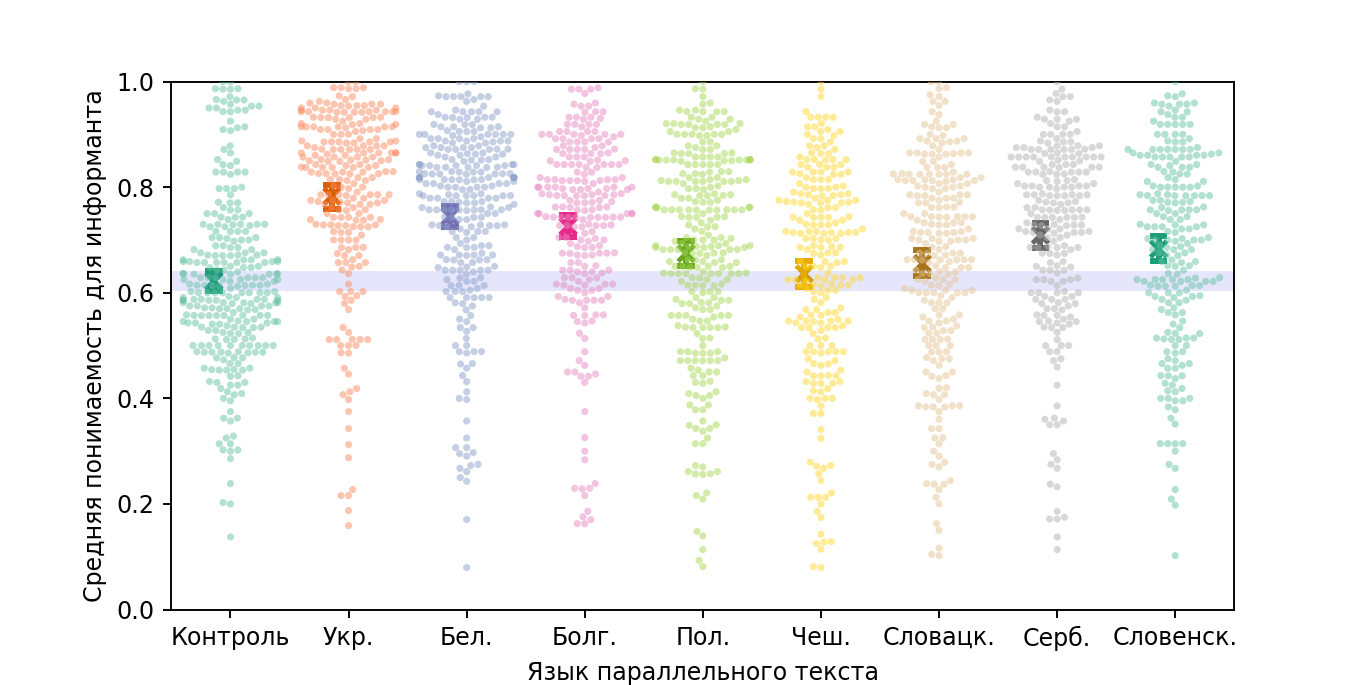

Select(description='Test: ', index=6, options=('1', '2', '3', '4', '5', '6', 'All'), value='All')

Output()

In [93]:
%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(8,4), num=1)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian'], value='Russian', description='Language: ')
esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='All', description='Test: ')
#ui = HBox([lsel,esel])
out = interactive_output(show_langs, {'test': esel})
#out.layout.height = '200px'
display(esel, out)
fig.savefig('img_res/Fig_1_general_distribution_users.png', dpi = 600)

In [94]:
from matplotlib.lines import Line2D
from matplotlib.text import Text as plText

In [121]:
#dir(axes.get_xticklabels()[0])
#type(axes.get_xticklabels()[0])
#[(l.x+0.5, l.y, l.text) for l in axes.get_xticklabels()]
[plt.Text(l._x+0.5, 0, l._text) for l in axes.get_xticklabels()]

[Text(0.5, 0, '1'),
 Text(0.5, 0, '2'),
 Text(0.5, 0, '3'),
 Text(0.5, 0, '4'),
 Text(0.5, 0, '5'),
 Text(0.5, 0, '6')]

<IPython.core.display.Javascript object>


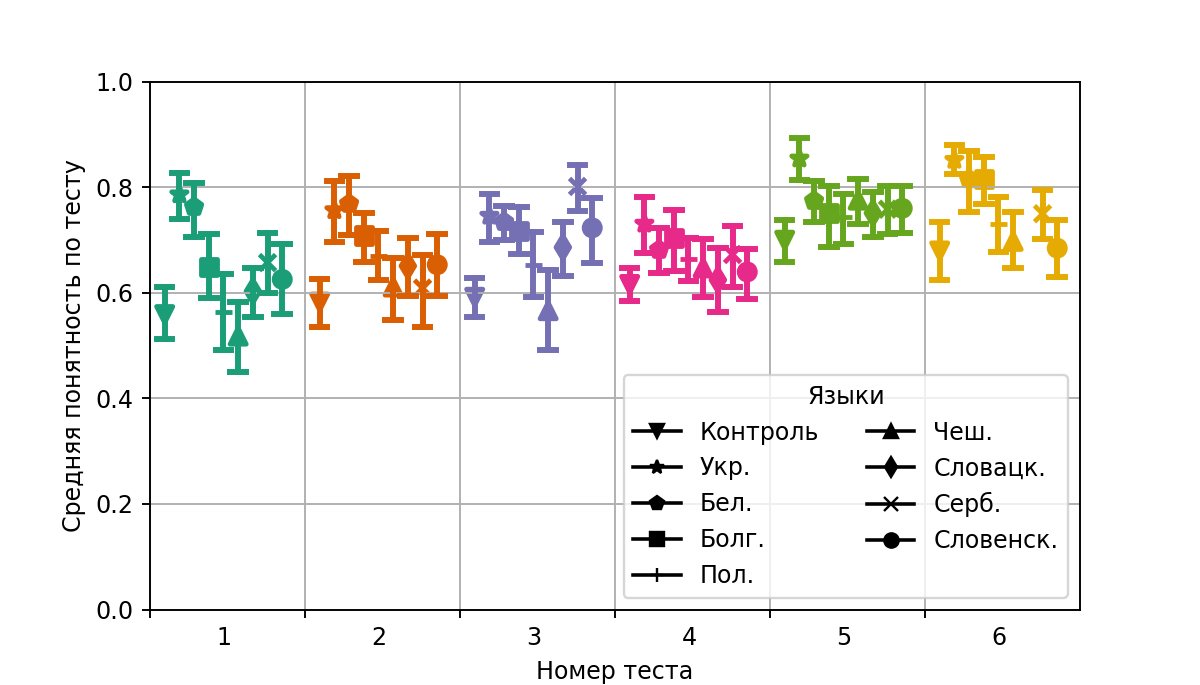

In [160]:
data2 = user_data[['parallel_lang', 'mean_mark', 'test_id']]
data = data2.groupby(['parallel_lang', 'test_id']).agg(['count', 'mean', 'std'])
data['ci'] = 1.96 * data[('mean_mark', 'std')] / np.sqrt(data[('mean_mark', 'count')])
data['ci_min'] = data[('mean_mark', 'mean')] - data['ci']
data['ci_max'] = data[('mean_mark', 'mean')] + data['ci']
data = data.drop([('mean_mark', 'std'), 'ci'], axis=1)
data.columns = ['count', 'mean', 'ci_min', 'ci_max']
data['test_id'] = [i[1] for i in data.index]
data['language'] = [i[0] for i in data.index]
#data.index = [i[0]+' '+str(i[1]) for i in data.index]
data.index = range(len(data.index))
#data.columns
data

order = ['No Parallel Text', 'Ukranian', 'Belorussian', 'Bulgarian', 
         'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
order2= ['Контроль', 'Укр.', 'Бел.', 'Болг.', 
         'Пол.', 'Чеш.', 'Словацк.', 'Серб.', 'Словенск.']

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=101)
axes.set_ylim(0, 1)

markers = ['o', 'x', 'd', '^', '+', 's', 'p', '*', 'v']

numl = len(order)
#for i in range(6):
for i in range(numl):
    #sns.pointplot(x='parallel_lang', y="uavg", data=data2[data2.test_id==6-i], palette="Dark2",#color="#FF0000", 
    sns.pointplot(x='test_id', y="mean_mark", data=data2[data2.parallel_lang==order[numl-i-1]], palette="Dark2",#color="#FF0000", 
                  markers=markers[i], errwidth=2.5, capsize=0.1, #order=order, 
                  join=False, legend=None, axes=axes) 
    #xs = axes.get_xticks()
    for j in range(i+1):
        offset = moveCollection(axes, j, 6/70., "right")
    moveLines(axes, offset, "right")
axes.set_xlim(0, 6)
plt.ylabel('Средняя понятность по тесту')
plt.xlabel('Номер теста')
axes.set_xticklabels([' '*20+str(i) for i in range(1, 7)])

axes.grid()

_ = axes.legend(handles=[Line2D([], [], marker=m, color='black') for m in markers[::-1]], labels=order2,
                loc = 'lower right', ncol=2, title='Языки')

fig.savefig('img_res/Fig_2_distribution_users_tests.png', dpi = 600)

<IPython.core.display.Javascript object>


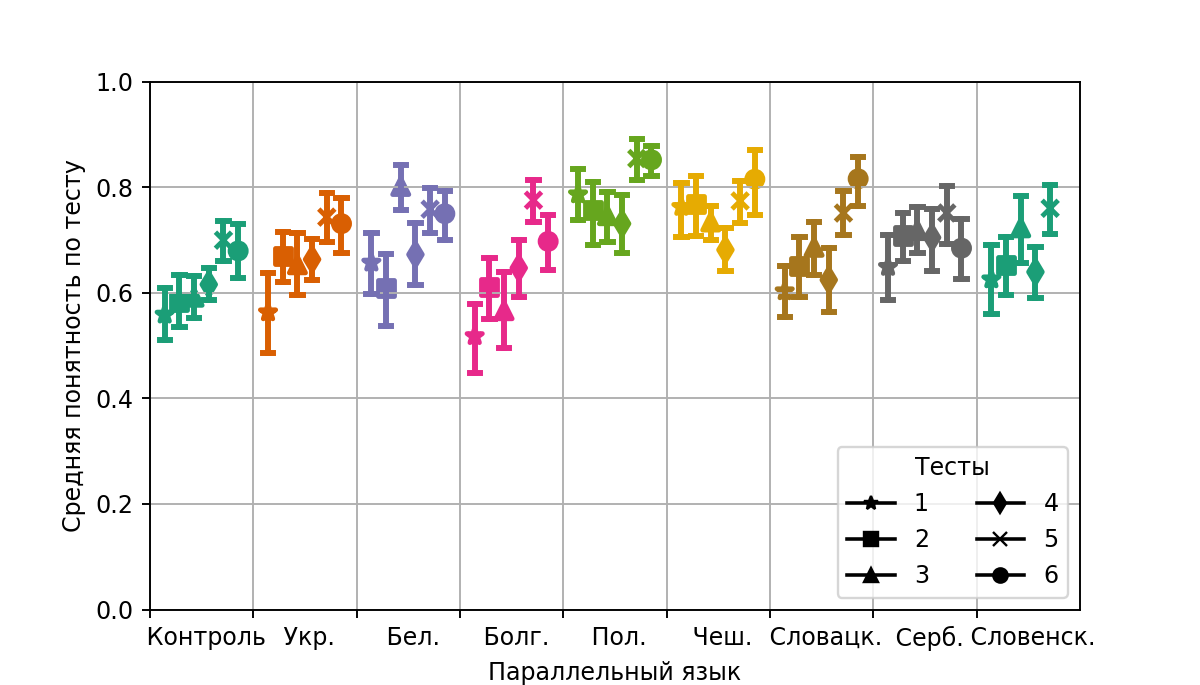

In [161]:
data2 = user_data[['parallel_lang', 'mean_mark', 'test_id']]
data = data2.groupby(['parallel_lang', 'test_id']).agg(['count', 'mean', 'std'])
data['ci'] = 1.96 * data[('mean_mark', 'std')] / np.sqrt(data[('mean_mark', 'count')])
data['ci_min'] = data[('mean_mark', 'mean')] - data['ci']
data['ci_max'] = data[('mean_mark', 'mean')] + data['ci']
data = data.drop([('mean_mark', 'std'), 'ci'], axis=1)
data.columns = ['count', 'mean', 'ci_min', 'ci_max']
data['test_id'] = [i[1] for i in data.index]
data['language'] = [i[0] for i in data.index]
#data.index = [i[0]+' '+str(i[1]) for i in data.index]
data.index = range(len(data.index))
#data.columns
data

order = ['No Parallel Text', 'Ukranian', 'Belorussian', 'Bulgarian', 
         'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
order2= ['Контроль', 'Укр.', 'Бел.', 'Болг.', 
         'Пол.', 'Чеш.', 'Словацк.', 'Серб.', 'Словенск.']

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=101)
axes.set_ylim(0, 1)

markers = ['o', 'x', 'd', '^', 's', '*']

numl = len(order)
for i in range(6):
#for i in range(numl):
    sns.pointplot(x='parallel_lang', y="mean_mark", data=data2[data2.test_id==6-i], palette="Dark2",#color="#FF0000", 
    #sns.pointplot(x='test_id', y="mean_mark", data=data2[data2.parallel_lang==order[numl-i-1]], palette="Dark2",#color="#FF0000", 
                  markers=markers[i], errwidth=2.5, capsize=0.1, #order=order, 
                  join=False, legend=None, axes=axes) 
    #xs = axes.get_xticks()
    for j in range(i+1):
        offset = moveCollection(axes, j, 6/70., "right")
    moveLines(axes, offset, "right")
axes.set_xlim(0, numl)
plt.ylabel('Средняя понятность по тесту')
plt.xlabel('Параллельный язык')
axes.set_xticklabels([' '*15+i for i in order2])

axes.grid()

_ = axes.legend(handles=[Line2D([], [], marker=m, color='black') for m in markers[::-1]], 
                labels=range(1, 7), loc = 'lower right', ncol=2, title='Тесты')

fig.savefig('img_res/Fig_3_distribution_users_languagess.png', dpi = 600)

Как видно из полученных значений, для носителей русского языка по результатам трех тестов понятными являются украинский, белорусский и болгарский языки. Для словацкого и сербского языка не было получено доверительного результата во всех тестах (хотя в среднем сербский язык доверительно понятен), а польский и чешский языки почти не отличаются от контроля. При этом первый тест оказался сложнее второго и третьего - результаты для него в среднем хуже.

Для украинского языка доверительно понятны только русский и белорусский языки, тогда как все остальные не смогли доверительно разделиться.

Для сербского языка доверительно отделился русский язык, и частично белорусский и польский. Для чешского языка улучшение не наблюдается.

Ниже находятся сервисные функции для отображения графиков.

In [179]:
# Drawing data on the number of partisipants.
def show_age(field: str, test: str):
    if test == 'All':
        data2 = user_data[[field, 'mean_mark']]
        data3 = user_data[[field, 'mean_mark', 'parallel_lang']]
    else:
        data2 = user_data[[field, 'mean_mark']][all_users.test_id == int(test)]
        data3 = user_data[[field, 'mean_mark', 'parallel_lang']][all_users.test_id == int(test)]

    if field == 'age':
        order = ['sch', 'bak', 'mag', 'asp', 'fin', 'unk', 'unk2']
    elif field == 'spec':
        order = ['yes', 'no', 'unk', 'unk2']
        
    data = calcCIFrame(data2, field)
    data = orderIndex(data, order)
    display(data.T)
  
    data3['no parallel text'] = data3['parallel_lang'] == 'No Parallel Text'
    
    axes.clear()

    axes.set_ylim(0, 1)
    sns.pointplot(x=field, y="mean_mark", data=data3, color="#FF0000", 
                  markers="x", order=order, errwidth=1.5, capsize=0.1, 
                  join=False, legend=None, ax=axes) 
    offset = moveCollection(axes, 0, 6/72., "left")
    moveLines(axes, offset)

    #sns.boxplot(x="speciality", y="uavg", data=datas[(datas.ln1==lang)], order=["yes", "no"], notch=True, ax=axes[0])
    sns.swarmplot(x=field, y="mean_mark", data=data3, order=order, 
                  palette="Set2", hue='no parallel text',
                    size=4, color=".3", linewidth=0, ax=axes, alpha=0.7)
    #axes.set_title(lang)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha='right')

    
    # If there is any difference between linguists and non-linguists?
    # It is for pupils and bachelors, but not for masters and alumni.
    if field == 'age':
        if test == 'All':
            datal = user_data[[field, 'mean_mark', 'parallel_lang']][user_data.speciality=='yes']
            sns.pointplot(x=field, y="mean_mark", data=datal, color="#00FF00", 
                          markers="x", order=order, errwidth=1.5, capsize=0.1, 
                          join=False, legend=None, ax=axes) 
            datan = user_data[[field, 'mean_mark', 'parallel_lang']][user_data.speciality=='no']
            sns.pointplot(x=field, y="mean_mark", data=datan, color="#0000FF", 
                          markers="x", order=order, errwidth=1.5, capsize=0.1, 
                          join=False, legend=None, ax=axes) 
        else:
            datal = user_data[[field, 'mean_mark', 'parallel_lang']] \
                             [(all_users.test_id == int(test)) & (user_data.speciality=='yes')]
            sns.pointplot(x=field, y="mean_mark", data=datal, color="#00FF00", 
                          markers="x", order=order, errwidth=1.5, capsize=0.1, 
                          join=False, legend=None, ax=axes) 
            datan = user_data[[field, 'mean_mark', 'parallel_lang']] \
                             [(all_users.test_id == int(test)) & (user_data.speciality=='no')]
            sns.pointplot(x=field, y="mean_mark", data=datan, color="#0000FF", 
                          markers="x", order=order, errwidth=1.5, capsize=0.1, 
                          join=False, legend=None, ax=axes) 
    
    offset = moveCollection(axes, 0, 12/72., "left")
    moveLines(axes, offset)
    _ = moveCollection(axes, -1, 12/72., "left")
    _ = moveCollection(axes, -2, 12/72., "left")
    axes.set_ylabel('Intelligibility')
    


Посмотрим теперь на зависимость ответов пользователей от их уровня образования.

Строки таблицы обозначены также как и выше. Столбцы даются в следующем порядке:
- *sch* - школьники;
- *bak* - бакалавры;
- *mag* - магистранты;
- *asp* - аспиранты;
- *fin* - завершили обучение;
- *unk* - не указали информацию;
- *unk2* - участники третьего теста для русского языка (информация не собиралась).

Розовые точки означают контрольную группу.

Красным обозначены интервалы по всем пользователям, зеленым - по получившим или получающим то или иное образование, связанное с языком, синим - не получившие такого образования.

<IPython.core.display.Javascript object>


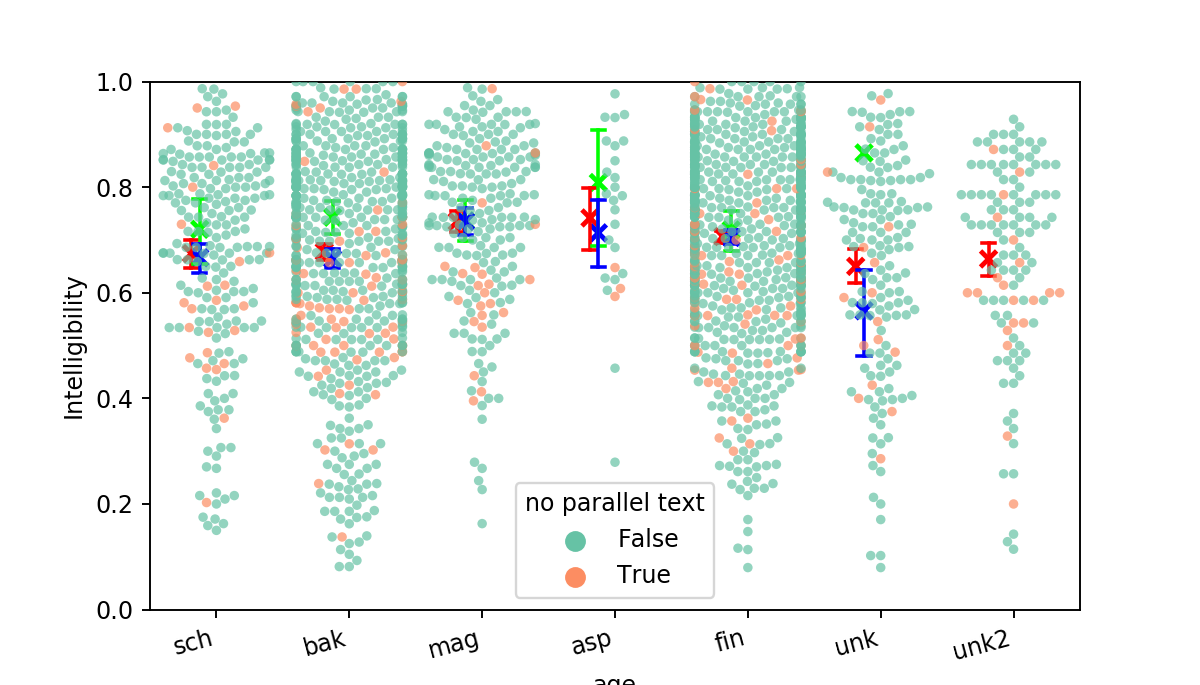

Output()

In [180]:
%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=2)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian', 'All'], value='Russian', description='Language: ')
fsel = Select(options=['age', 'spec'], value='age', description='Values: ')
esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='All', description='Test: ')
ui = HBox([fsel, esel])
out = interactive_output(show_age, {'field': fsel, 'test': esel})
#out.layout.height = '200px'
display(ui, out)

Как видно из полученных данных, бакалавры менее аккуратно заполняют тест. "Хвост" с низкими значениями оценки частично объясняется тем, что ближе к середине теста часть студентов отправляла анкету, сотавив вторую половину незаполненной. Среди прочих участников такое поведение является более редким. Большинство участников третьего теста также были бакалаврами, их поведение является сходным. Результаты для школьников и аспирантов доверительно лучше.

Ответы "школьник" для украинского языка являются ошибочными, так как школьники не тестировались. Подавляющее большинство закончивших свое обучение пришли с сервиса "Толока".

Все носители сербского языка являются бакалаврами университета города Нови Сад, поэтому какие-либо выводы сделать невозможно.

Информация по украинскому и сербскому языкам относительно лингвистического образования участников также не позволяет сделать какие-либо выводы. Однако для русского языка можно построить следующую картину. При отсутствии параллельного текста результаты в среднем не изменяются. Однако при наличии такого текста, участники, имеющие отношение к лингвистике, дают доверительно лучшие ответы. Но если вид образования наложить на уровень образования, то становится понятным, что лингвистическое образование улучшает результаты только для школьников или бакалавров, а уже начиная с магистратуры результаты практически не отличаются. 

Мы также исследовали зависимость ответов от знания других славянских языков. Однако исследование не показало значительных отклонений от группы, не указавших знания других языков.

<IPython.core.display.Javascript object>


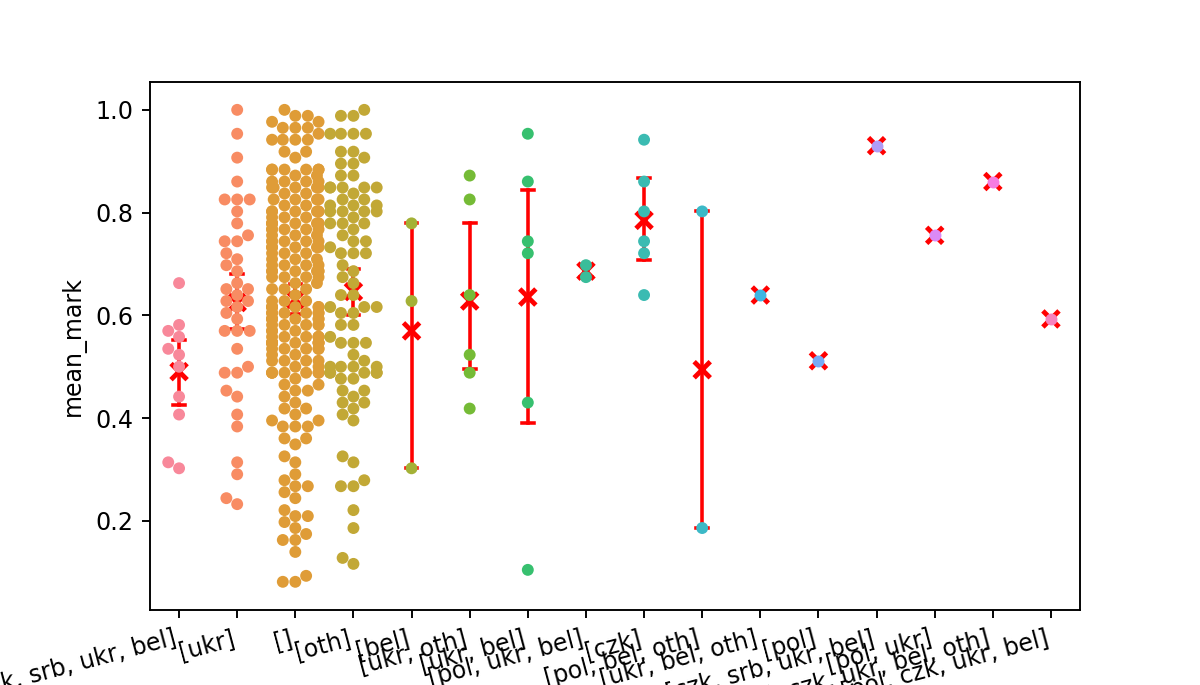

Output(layout=Layout(height='100px'))

In [290]:
def drawForeign(test_no):
    if test_no == 'All':
        dat = user_data
    else:
        dat = user_data[user_data.test_id==int(test_no)]
    flangs = dat.groupby('known_langs').count()
#    flangs = list(flangs[flangs['native_lang']>2].index)
    flangs = list(flangs.index)
    dat = dat[dat['known_langs'].map(lambda x: x in flangs)].copy()
    #display(dat)
    axes.clear()
    
    sns.pointplot(x='known_langs', y='mean_mark', data = dat, markers='x', color='r', 
                  errwidth=1.5, capsize=0.2, alpha=0.5, join=False, axes=axes)
    sns.swarmplot(x='known_langs', y='mean_mark', data = dat, ax=axes)
    
%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=2)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian', 'All'], value='Russian', description='Language: ')
esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='1', description='Test: ')
ui = HBox([lsel, esel])
out = interactive_output(drawForeign, {'test_no': esel})
axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha='right')

out.layout.height = '100px'
display(ui, out)

Также была рассмотрена гипотеза зависимости понятности текста в зависимости от наличия в нем сходных слов. Известно, что многие слова разных славянских языков имеют общие корни. Наличие таких слов облегчает понимание текста.

Ниже привеена разметка слов текстов по сходству. Знаком 1 обозначены слова, имеющие общий корень. Знаком 2 обозначены слова, для которых в родном языке имеется слово со сходным смыслом и тем же корнем, что в параллельном тексте. Знаком 0 обозначены слова, не имеющие аналогов или какого-либо сходства в родном языке. Наконец, знаком ! обозначены "ложные друзья переводчика", например, "за его спиной" - "у яго за _плячыма_" (в русском языке "за плечами" имеет другое значение.

In [209]:
# These data are for statistical image generation.
sim_rus1={#    0        10        20        30        40
"Belorussian":"101!121122201111112110111121021111011011100",
"Bulgarian"  :"200!!100201020111122201122012201!12112211!0",
"Czech"      :"010!00020021010011222!01000202!2!2221!21000",
"Polish"     :"021!01102022102111202201010002!000!01001002",
"Serbian"    :"01000100!011210111220!11220100!1!122122100!",
"Slovak"     :"220!00000022010101220!110002220210211020002",
"Ukranian"   :"1211121020121111012110111221010111001210100",   
"Slovene"    :"002!012!!020000011021!01222002!2!020102112!",
}

# 0 - nothing similar, 1 - same word root, 2 - has word with a similar sence, ! - false translator's friend.
sim_rus2={#    0        10        20        30        40
"Belorussian":"110211112110001110210202!0!!111121201020",
"Bulgarian"  :"!10111200021!121100100010!1211120121!120",
"Czech"      :"!!02010201002!21000100200!2001102121!0!0",
"Polish"     :"10000001!120!02100010022!0101112!021!020",
"Serbian"    :"!0011010!020012110!100020!10111!11210120",
"Slovak"     :"!00201022100022100010000!!2011120121!120",
"Ukranian"   :"21011110!110201110010102!0221111!1201220",   
"Slovene"    :"!201100000!0202102!1000222!2111!!021!1!0",
}

# 0 - nothing similar, 1 - same word root, 2 - has word with a similar sence, ! - false translator's friend.
sim_rus3={#    0        10        20        30
"Belorussian":"100220101222!122111!1!121!10!211121",
"Bulgarian"  :"12100111!0002100112!1!101!11!111101",
"Czech"      :"110220!002000!00!1!22!0!!!!2!1!102!",
"Polish"     :"100222!01202!!00!12!2!12!!!2!1!1121",
"Ukranian"   :"111022!012!2!!00!1211!12!!!2!1!1121",
"Slovak"     :"111220!0220!0!!0!1!!2!22!2!2!!2111!",
"Slovene"    :"102222!200020!!0!1122!12!1!2!!2110!",
"Serbian"    :"11!0211!012001101100201!1!10!101122",
}

# 0 - nothing similar, 1 - same word root, 2 - has word with a similar sence, ! - false translator's friend.
sim_rus4={#    0        10        20        30        40
"Ukranian"   :"110!1!1!21212!22!1!2!01!10001!21000!1001!00!",
"Belorussian":"01!1212020212222!2!2!0121!001!2!!00210011000",
"Polish"     :"20!12!202!022022!2!2!01010!01!20!00221121000",
"Bulgarian"  :"02012212!1!2!121!!22111!211111010!020121110!",
"Czech"      :"02!11!!20!200021!122201010!!0!01202022111220",
"Slovak"     :"!2201!220!210021!2!02!1010!000012010121!1!!2",
"Slovene"    :"22000!0002220021!2122202!2202220!0!210121110",
"Serbian"    :"!20112000122221200222102!2121!02!00!0101100!",
}

# 0 - nothing similar, 1 - same word root, 2 - has word with a similar sence, ! - false translator's friend.
sim_rus5={#    0        10        20        30        40
"Ukranian"   :"211101111021110111211110!10020102!010",
"Belorussian":"011001010001100!1102111!!000201022!10",
"Polish"     :"21100101100200201102111000!!101010010",
"Bulgarian"  :"222!00!!10221!2!12!01111!2111221121!1",
"Czech"      :"221!!0!110221!201002111!!000101111010",
"Slovak"     :"22!!1!!112221!!111021110!000111010210",
"Slovene"    :"2!20!20!!!2200!1!102111!02111!!010212",
"Serbian"    :"2!2!!!!!00221!!011!!1110001112!000002",
}

# 0 - nothing similar, 1 - same word root, 2 - has word with a similar sence, ! - false translator's friend.
sim_rus6={#    0        10        20        30        40
"Ukranian"   :"!1110211210012210001001111210111101",
"Belorussian":"!11112110101111!0011010111120111101",
"Polish"     :"!11122110100122!0022001121100122200",
"Bulgarian"  :"111110011101111112!10!0111000121112",
"Czech"      :"!11101200000100!00010!0!0!1!100001!",
"Serbian"    :"11111201211!1!!1!!!10!01!102!211112",
"Slovene"    :"!12120211100122!2202002221!22!22120",
}


Код, размещенный ниже, позволяет посмотреть соответствия пропущенных слов между собой. Заметим, что в первом тексте в некоторых языках слова внутри нескольких предложений поменялись местами. В таблице ниже этот недостаток исправлен.

In [211]:
def makeWords(langs, texts, set_no):
    words=pd.DataFrame()
    for lang in langs:
        words0=[]
        for i, sent in enumerate(texts['sent'][(texts['id_set']==set_no) & (texts['lang_name']==lang)]):
            [words0.append(s) for j, s in enumerate(sent.split('_')) if j%2==1]
        words[lang]=words0
    return words

def makeStatistics(words, wo_frame, rf, sim, set_no):
    tmpres=[]
    langs3=[l for l in rf.columns if l in words.columns]
    count_pos = list(wo_frame.columns).index('mean_mark')
    for j, word in enumerate(words['Russian']):
        for lang in langs3:
            a=rf[lang][set_no, j]
            b=wo_frame[(wo_frame.answer_no == j) & (wo_frame['test_id'] == set_no)].iloc[0, count_pos]
            if b!=0:
                tmpres.append({'orig':word, 'lang':lang, 'fword':words[lang][j], 'type':sim[lang][j], 'wo_par':b, 'w_par':a, 'rel':a/b})
            else:
                tmpres.append({'orig':word, 'lang':lang, 'fword':words[lang][j], 'type':sim[lang][j], 'wo_par':b, 'w_par':a, 'rel':0})

    return pd.DataFrame(data=tmpres, columns=['orig', 'lang', 'fword', 'type', 'wo_par', 'w_par', 'rel'])


In [186]:
def showWords(test_no: str):
    if test_no == '1' or test_no == '2':
        langs = ['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
        display(makeWords(langs, text_frame, test_no))
    elif test_no == '3':
        langs3 = ['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
        display(makeWords(langs3, text_frame, '3'))
    elif test_no == '4' or test_no == '5':
        langs4 = ['Russian', 'Ukranian', 'Belorussian', 'Polish', 'Bulgarian', 'Czech', 'Slovak', 'Serbian', 'Slovene']
        display(makeWords(langs4, text_frame, test_no))
    else:
        langs4 = ['Russian', 'Ukranian', 'Belorussian', 'Polish', 'Bulgarian', 'Czech', 'Serbian', 'Slovene']
        display(makeWords(langs4, text_frame, test_no))
        
%matplotlib notebook

esel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
ui = HBox([esel])
out = interactive_output(showWords, {'test_no': esel})
display(ui, out)


Output()

Код ниже является сервисным и служит для отображения понятности в зависимости от типа слова.

In [206]:
# Generates an image for statistical analysis of dependency 
# between phonetical similarity and intelligibility.
def processIntelligibility(data, texts):
    all_frame = data[data['parallel_lang'] != 'No Parallel Text'].copy()
    wo_frame = data[data['parallel_lang'] == 'No Parallel Text'].copy()
    all_frame['test_id'] = all_frame['test_id'].astype("str")
    wo_frame['test_id'] = wo_frame['test_id'].astype("str")
    
    langs  = ['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
    langs3 = ['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
    langs4 = ['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Polish', 'Czech', 'Slovak', 'Serbian', 'Slovene']
    langs5 = ['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Polish', 'Czech', 'Serbian', 'Slovene']

    rf=all_frame.pivot_table(values="mean_mark", index=['test_id', 'answer_no'], columns='parallel_lang')

    # !!! If you will not use these wordsN, it will be faster. But if you suddenly will need the words list, you will reimplement this.
    words1=makeWords(langs, texts, '1')
    words2=makeWords(langs, texts, '2')
    words3=makeWords(langs3, texts, '3')  
    words4=makeWords(langs4, texts, '4')  
    words5=makeWords(langs4, texts, '5')  
    words6=makeWords(langs5, texts, '6')  
    changes={"Polish":[(16, 17), (23, 24), (36, 37)], "Czech":[(16, 17), (26, 27)], "Slovak":[(26, 27)], "Bulgarian":[(16, 17), (23, 24)], "Belorussian":[(40, 41)]}

    # In the first text some words was swapped during the translation.
    for c_lang, chang in changes.items():
        for ch in chang:
            words1[c_lang][ch[0]], words1[c_lang][ch[1]] = words1[c_lang][ch[1]], words1[c_lang][ch[0]]
            rf[c_lang]['1',ch[0]], rf[c_lang]['1',ch[1]] = rf[c_lang]['1',ch[1]], rf[c_lang]['1',ch[0]]

    all_resn = []
    all_resn.append(makeStatistics(words1, wo_frame, rf, sim_rus1, '1'))
    all_resn.append(makeStatistics(words2, wo_frame, rf, sim_rus2, '2'))
    all_resn.append(makeStatistics(words3, wo_frame, rf, sim_rus3, '3'))
    all_resn.append(makeStatistics(words4, wo_frame, rf, sim_rus4, '4'))
    all_resn.append(makeStatistics(words5, wo_frame, rf, sim_rus5, '5'))
    all_resn.append(makeStatistics(words6, wo_frame, rf, sim_rus6, '6'))
    all_tests=['test 1,', 'test 2,', 'test 3,', 'test 4,', 'test 5,', 'test 6,']
    return all_resn, all_tests

In [239]:
draw_shift = 2./72.

# Draws several results of test on the same figure.
def drawIntelligibility2(dats, nams):

    # Join data into one DataFrame.
    replacement=["same root", "similar word", "no analogues", "false friend"]
    replacement2=["1", "2", "0", "!"]
    ddd2 = []
    for n, dat2 in enumerate(dats):
        for r1,r2 in zip(replacement, replacement2):
            dat=dat2[dat2['type']==r2].copy()
            dat['type']=dat['type'].replace(r2, nams[n]+" "+r1)
            ddd2.append(dat)
    ddd=pd.concat(ddd2)
    
    order=[n+" "+r1 for r1 in replacement for n in nams]

    axes[0].clear()
    axes[1].clear()

    sns.pointplot(x=ddd['type'], y=ddd['wo_par'], color="#FF0000", markers="x", order=order, errwidth=1.5, capsize=0.2, join=False, legend=None, ax=axes[0]) 
    offset = moveCollection(axes[0], 0, draw_shift, "right")
    moveLines(axes[0], offset, "right")
    moveLines(axes[0], offset, "right")
    sns.pointplot(x=ddd['type'], y=ddd['w_par'], palette="Dark2", markers="x", order=order, errwidth=1.5, capsize=0.2, join=False, legend=None, ax=axes[0]) 
    offset = moveCollection(axes[0], 1, draw_shift, "left")
    moveLines(axes[0], offset, "left")

    sns.swarmplot(x='type', y='w_par', data=ddd, order=order,# hue='lang',
                  palette="Set2", size=2, color=".3", linewidth=0, ax=axes[0], alpha=0.7)
    
    sns.pointplot(x=ddd['type'], y=ddd['wo_par'], palette="Dark2", markers="x", order=order, errwidth=1.5, capsize=0.2, join=False, legend=None, ax=axes[1]) 
    offset = moveCollection(axes[1], 0, draw_shift, "left")
    moveLines(axes[1], offset)

    sns.swarmplot(x='type', y='wo_par', data=ddd, order=order,# hue='lang',
                  palette="Set2", size=2, color=".3", linewidth=0, ax=axes[1], alpha=0.7)

    axes[0].set_xticklabels([i  for j in range(4) for i in range(1,7)])
    axes[1].set_xticklabels([i  for j in range(4) for i in range(1,7)])
    axes[0].set(xlabel="Тест с параллельным текстом", ylabel="", ylim=(0,1))
    axes[1].set(xlabel="Контрольный тест", ylabel="", ylim=(0,1))
    axes[0].yaxis.grid(True)
    axes[1].yaxis.grid(True)
    

    patch_colors = ['#0011DD', '#FF0044', '#00FFDD', '#DD88DD']
    for i in range(4):
        patches = [Rectangle((-0.5+i*6, -0.5), 6, 2, alpha = 0.05, edgecolor=patch_colors[i])]
        pc = PatchCollection(patches, alpha = 0.05, facecolor=patch_colors[i])
        pc2 = copy.copy(pc)
        axes[0].add_collection(pc)  
        axes[1].add_collection(pc2)  
    
    plt.subplots_adjust(bottom = 0.3, wspace = 0.1)
    axes[0].set_ylabel('Понятность слов')
    
    axes[0].text(0.1, 0.02, "Однокор.")
    axes[0].text(7.1, 0.02, "Сходн.")
    axes[0].text(13.1, 0.02, "Разн.")
    axes[0].text(18.1, 0.02, "Ложн. др.")
    axes[1].text(0.1, 0.02, "Однокор.")
    axes[1].text(7.1, 0.02, "Сходн.")
    axes[1].text(13.1, 0.02, "Разн.")
    axes[1].text(18.1, 0.02, "Ложн. др.")
    
    fig.savefig('img_res/Fig_4_intelligibility_on_cognate.png', dpi = 600)    
    

def showIntelligibility():
    all_resn, all_tests = processIntelligibility(qu_data, text_frame)
    drawIntelligibility2(all_resn, all_tests)

Итак, построим график, показывающий зависимость понятности слова от его типа - однокоренное, есть однокоренной аналог, нет аналогов, ложный друг переводчика.

Каждая точка на графике слева означает слово в тесте с одним из параллельных языков, на графике справа - без параллельного теста (контроль). Доверитальные интервалы нарисованы тем же цветом, что и точки, цвета соответствуют типам слов и тестам. Красные доверительные интервалы на рисунке слева показывают соответствующие доверительные интервалы контроля (графика справа) и позволяют оценить изменения в понимаемости при наличии параллельного текста.

<IPython.core.display.Javascript object>


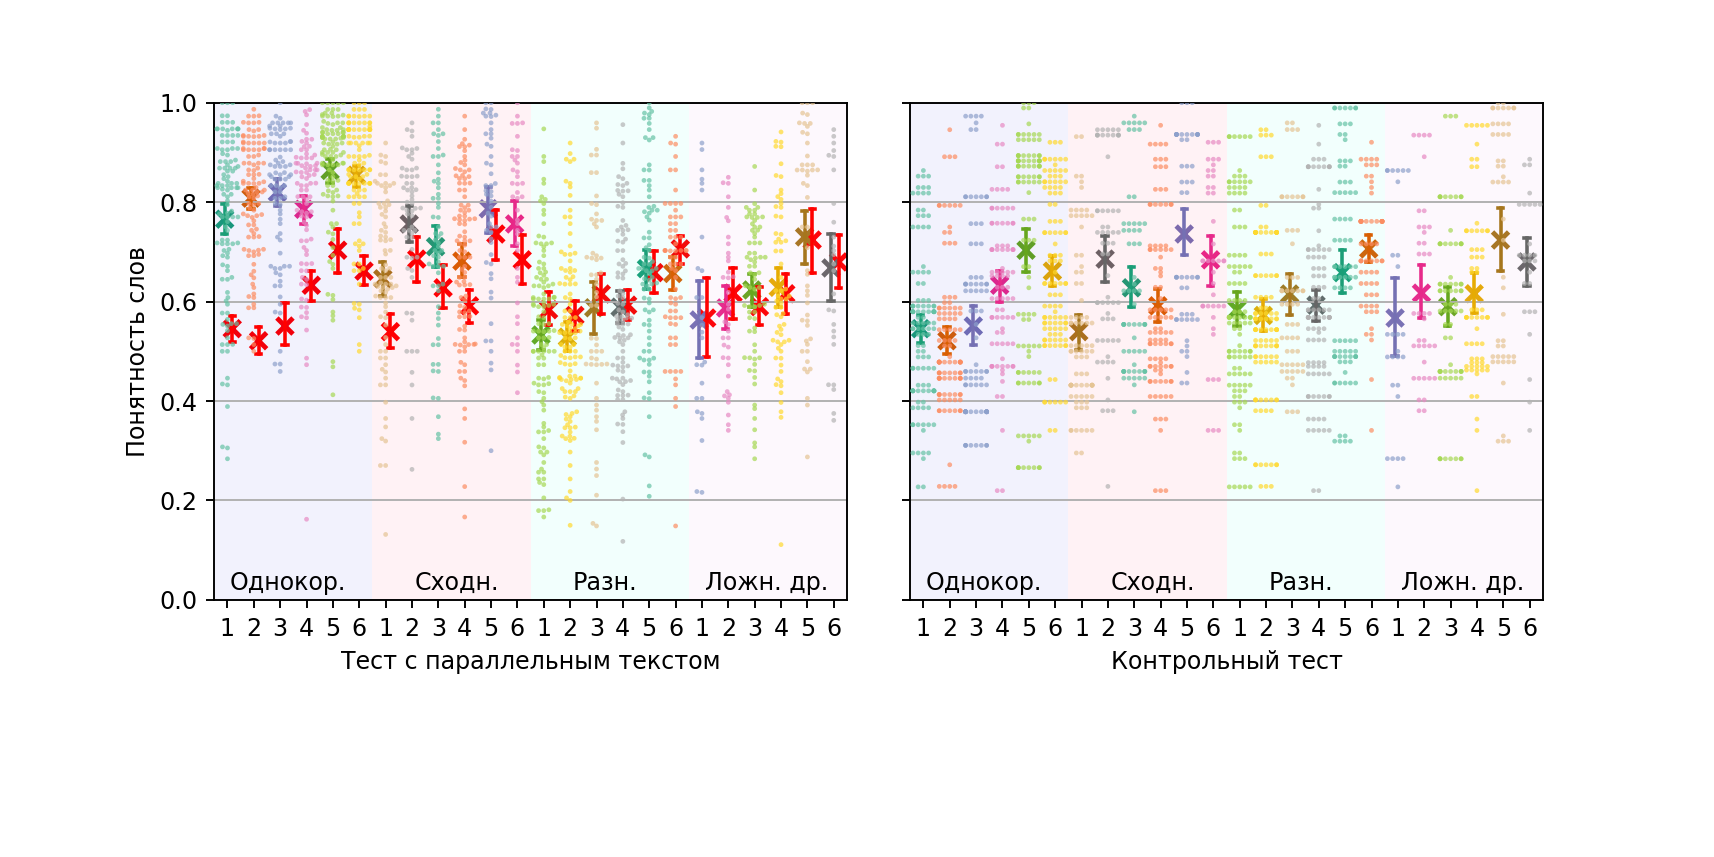

In [291]:
%matplotlib notebook

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4), num=3)
showIntelligibility()

# Названия групп (same, similar, ... только по-русски) можно написать текстом внизу над осью Х. Саму ось подписать как "Номер теста".

Из графиков видно, что в русском языке слова, однокоренные словам из параллельного текста, угадываются примерно в полтора раза лучше, чем при отсутствии подсказки. Для слов, имеющих сходные слова в языке параллельного текста, ситуация не столь однозначная. В первом тесте наблюдается доверительное улучшение, тогда как для второго и третьего текстов улучшение незначительно. Слова, не имеющие аналогов, и "ложные друзья переводчика" скорее мешают понимать текст.

Для украинского языка как однокоренные, так и сходные слова дают улучшение в понимании, а разница для слов без аналогов и "ложных друзей" незначительна.

В сербском языке ситуация такая же, как и в русском.

Теперь посмотрим как ведут себя тесты в зависимости от процента сходных слов в параллельном тексте. 

Ниже приведен сервисный код.

In [256]:
#all_resn[1][(all_resn[1]["type"]=='!')][['lang', 'w_par']].groupby('lang').count()['w_par']
all_resn, all_tests = processIntelligibility(qu_data, text_frame)
intellig = pd.DataFrame()
#mean1 = drawAnIntel(all_resn, intellig, "Russian", 'False Friends', 1, 43, axes, 'brief')
mean2 = drawAnIntel(all_resn, intellig, 'False Friends', 2, 40, axes)
intellig

,cnt2,intel2
lang,,
Belorussian,0.075,0.768421
Bulgarian,0.100,0.708446
Czech,0.150,0.580312
Polish,0.125,0.669034
Serbian,0.125,0.577564
Slovak,0.100,0.650847
Slovene,0.200,0.653041
Ukranian,0.075,0.756419


In [243]:
from scipy.stats import pearsonr

In [286]:
markers = ['', 'o', 'v', '^', 'x', '+', '*']
edge_colors = ['#000000','#FF0000', '#00FF00', '#0000FF', '#FF8800', '#8800FF', '#00FF88']

def drawAnIntel(all_resn, intellig, sameness, test_no, test_len, axes, show_legend = None):
    if sameness == 'Same':
        intellig['cnt'+str(test_no)] = all_resn[test_no-1][(all_resn[test_no-1]["type"]=='1')][['lang', 'w_par']].groupby('lang').count()['w_par']
    elif sameness == 'Same and Similar':
        intellig['cnt'+str(test_no)] = all_resn[test_no-1][(all_resn[test_no-1]["type"]=='1') | (all_resn[test_no-1]["type"]=='2')][['lang', 'w_par']].groupby('lang').count()['w_par']
    elif sameness == 'No analogues':
        intellig['cnt'+str(test_no)] = all_resn[test_no-1][(all_resn[test_no-1]["type"]=='0')][['lang', 'w_par']].groupby('lang').count()['w_par']
    elif sameness == 'False Friends':
        intellig['cnt'+str(test_no)] = all_resn[test_no-1][(all_resn[test_no-1]["type"]=='!')][['lang', 'w_par']].groupby('lang').count()['w_par']
    else:
        intellig['cnt'+str(test_no)] = all_resn[test_no-1][(all_resn[test_no-1]["type"]=='2')][['lang', 'w_par']].groupby('lang').count()['w_par']
    intellig['intel'+str(test_no)] = all_resn[test_no-1][['lang', 'w_par']].groupby('lang').mean()
    intellig['cnt'+str(test_no)] = intellig['cnt'+str(test_no)] / test_len
    mean = user_data[['parallel_lang', 'mean_mark']] \
                     [(user_data.test_id == test_no) & \
                      (user_data.parallel_lang == 'No Parallel Text')].mean().iloc[0]
    sns.scatterplot(x='cnt'+str(test_no), y='intel'+str(test_no), data=intellig, marker=markers[test_no],
                    hue=intellig.index, ax = axes, legend=show_legend, alpha=0.7)
    #marker=markers[test_no],
    #edgecolor=edge_colors[test_no],
    sns.lineplot([0, 1], [mean, mean], alpha = 0.5, linewidth = 1, ax = axes)
    axes.lines[-1].set_linestyle("--")
    return mean


def showIntel(sameness):
    all_resn, all_tests = processIntelligibility(qu_data, text_frame)
    intellig = pd.DataFrame()
    
    axes.clear()

    mean2 = drawAnIntel(all_resn, intellig, sameness, 2, 40, axes, 'brief')
    mean1 = drawAnIntel(all_resn, intellig, sameness, 1, 43, axes)
    mean3 = drawAnIntel(all_resn, intellig, sameness, 3, 35, axes)
    mean4 = drawAnIntel(all_resn, intellig, sameness, 4, 44, axes)
    mean5 = drawAnIntel(all_resn, intellig, sameness, 5, 37, axes)
    mean6 = drawAnIntel(all_resn, intellig, sameness, 6, 37, axes)
    intellig.loc["No Parallel Text"] = (None, mean1, None, mean2, None, mean3, None, mean4, None, mean5, None, mean6)
    intellig.columns = ['%Sim.Words, Test1', 'Avg.Results, Test1', 
                        '%Sim.Words, Test2', 'Avg.Results, Test2',
                        '%Sim.Words, Test3', 'Avg.Results, Test3',
                        '%Sim.Words, Test4', 'Avg.Results, Test4',
                        '%Sim.Words, Test5', 'Avg.Results, Test5',
                        '%Sim.Words, Test6', 'Avg.Results, Test6']
    sns.lineplot([0, 1], [0, 1], color = 'r', ax = axes)
    axes.set_ylabel('Понятность теста')

    langs2 = ['Язык пар. текста', 'Белорусский', 'Болгарский', 'Чешский', 
              'Польский', 'Сербский', 'Словацкий', 'Словенский', 'Украинский']
    axes.legend(loc="lower right")
    for i, l in enumerate(langs2):
        axes.get_legend().get_texts()[i].set_text(l)
    same2title = {"Same": "Однокоренные", "Similar":"Сходные", "No analogues": "Без аналогов", "False Friends":"Ложные друзья"}
    axes.set_title(same2title.get(sameness, "XXX"))
    axes.set_xlabel("Доля слов данного типа")
    display(intellig)
    
    same2fig = {"Same": "_1", "Similar":"_2", "No analogues": "_3", "False Friends":"_4"}
    fig.savefig('img_res/Fig_5'+same2fig.get(sameness, "_X")+'_correlation_on_type.png', dpi = 600)
    
    
    print("Correlation by tests")
    t1, t2 = [], []
    for i in range(6):
        t = intellig.iloc[0:-1, i*2:i*2+2].dropna()
        t1.extend(t.iloc[:, 0])
        t2.extend(t.iloc[:, 1])
        print(f"Test {i+1}", pearsonr(t.iloc[:,0], t.iloc[:,1])[0])
    print("All Tests", pearsonr(t1, t2)[0])
    print("\nCorrelation by language")
    for i in range(intellig.shape[0]-1):
        t = pd.DataFrame([[intellig.iloc[i, 2*j], intellig.iloc[i, 2*j+1]] 
                          for j in range(int(intellig.shape[1]/2))])
        t = t.dropna()
        print(intellig.index[i], pearsonr(t.iloc[:, 0].dropna(),
                                          t.iloc[:, 1].dropna())[0])
    
        

Ниже показаны соотношение процента сходных слов и результатов прохождения теста. Тесты с разными параллельными текстами показаны разным цветом, однако номера тестов не обозначены. Соответствующую информацию можно найти в таблице. Красная линия по диагонали дана в качества базы и соответствует линии ((0,0), (1,1)). Горизонтальные линии показывают результаты прохождения теста без параллельного текста в качестве подсказки.


<IPython.core.display.Javascript object>


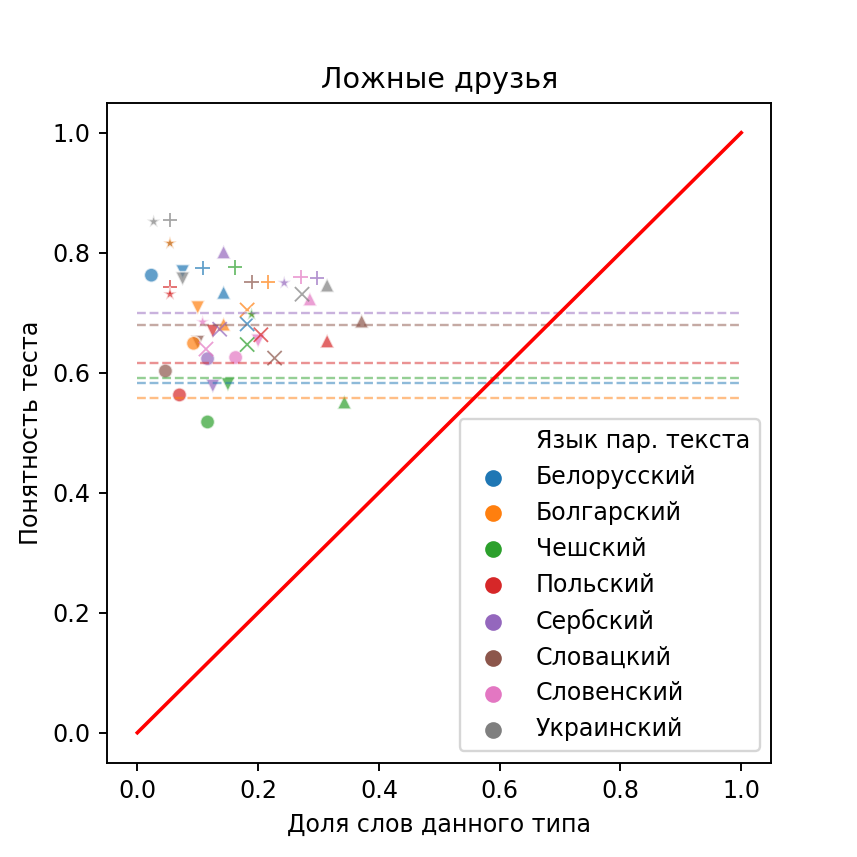

Select(options=('Same', 'Similar', 'Same and Similar', 'No analogues', 'False Friends'), value='Same')

Output()

In [287]:
%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(5, 5), num=4)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian'], value='Russian')
hsel = Select(options=['Same', 'Similar', 'Same and Similar', 'No analogues', 'False Friends'], value='Same')
#ui = HBox([hsel])
out = interactive_output(showIntel, {'sameness':hsel})
#out.layout.height = '320px'
display(hsel, out)


Как видно из этого графика, результаты тестов тяготеют к диагональной прямой. При этом результаты для русского и сербского языков лежат в большинстве своем выше нее, тогда как для украинского языка они разделились примерно поровну.

Несмотря на наличие общего тренда, отдельные языки ведутся себя по-разному. Рассмотрим случай родного русского языка. Результаты для белорусского, чешского и сербского языков практически не меняются с увеличением процента сходных слов. Для украинского, словацкого, польского и болгарского наблюдается обратная зависимость - увеличение числа сходных слов уменьшает понятность текстов.

Здесь можно назвать две причины такого поведения. Во-первых, собранная статистика недостаточна - необходимо больше тестов для обнаружения средней точки. Во-вторых, мы можем высказать гипотезу о том, что понятность слова зависит от его частоты употребления в текстах и со связанными с ним словами.

Ниже можно посмотреть изменение результатов для отдельных слов при наличии или отсутствии параллельного текста. Здесь можно выбрать номер теста, пороговое значение, должно ли значение быть меньше или превосходить пороговое значение, слова какого типа следует отображать.

Фильтрация производится по значениям, показанным на параллельных текстах.

In [288]:
def showWords(test_n, coef, word_type, thr):
    all_resn, all_tests = processIntelligibility(qu_data, text_frame)
    test_n = int(test_n)-1
    coef = {'<': 1, '>': -1}[coef]
    if word_type != 'All':
        word_type = {'Same':'1', 'Similar': '2', 'No analagues': '0', 'False friend': '!'}[word_type]
        dat = all_resn[test_n][(all_resn[test_n]["type"]==word_type) & (all_resn[test_n]["w_par"]*coef<thr*coef)].copy()
    else:
        dat = all_resn[test_n][(all_resn[test_n]["w_par"]*coef<thr*coef)].copy()
    dat["type"] = dat["type"].replace({'1': 'same', '2': 'similar', '0': 'no analogues', '!': 'false friend'})
    dat.columns = ["Russian Word", "Language", "Translation", "Word Class", "Control Group", "Parallel text", "Relation"]
    display(dat)

tsel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
lsel = Select(options=['<', '>'], value='<', description="value")
trsel = FloatSlider(min=0, max=1, step=0.1, value=0.5, description="threshold")
ssel = Select(options=['Same', 'Similar', 'No analagues', 'False friend', 'All'], 
              value='Same', description="Words are")
ui = HBox([tsel, lsel, trsel, ssel])
out = interactive_output(showWords, {'test_n': tsel, 'coef':lsel, 'word_type': ssel, 'thr': trsel})
#out.layout.height = '320px'
display(ui, out)


Output()

### Выводы

- Наличие параллельного текста на незнакомом, но близком славянском языке помогает понять пропущенные слова в тексте. 
- Для русскоговорящих участников, польский и чешский языки только мешали проходить тест.
- Хорошо понимаются слова с общим или сходным корнем.
